# Tourist satisfaction with transport systems to Mount Etna, Sicily. Part 2. Classification.

# This cell will prompt you to connect this notebook with your google account.
from google.colab import drive                                                                        
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Academy/+ Papers/en_proceso/mount_etna/'


In [1]:
base_dir = '../' # To run locally

# 1. Data pre-processing

In [2]:
#!pip install pycaret[full]

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import spacy
import imblearn
#spacy.load("en_core_web_sm")

#ignore log(0) and divide by 0 warning
np.seterr(divide = 'ignore');
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

print('Libraries read!')

Libraries read!


## Reading data

In [4]:
lda_title_data_tuned = pd.read_csv(base_dir + 'output/lda_title_data_tuned.csv')
lda_review_data_tuned = pd.read_csv(base_dir + 'output/lda_review_data_tuned.csv')

# 5. Classification model

### Merging data

In [5]:
lda_title_data_tuned

,Title_title,Title_sentiment_rating,Title_Topic_0,Title_Topic_1,Title_Topic_2,Title_Dominant_Topic,Title_Perc_Dominant_Topic
0,hard,0,0.166959,0.666077,0.166963,Topic_1,0.67
1,must see active volcano least life,0,0.903365,0.048886,0.047749,Topic_0,0.90
2,cost cable car top,0,0.066697,0.066723,0.866580,Topic_2,0.87
3,orgainise easy access,0,0.086313,0.083895,0.829793,Topic_2,0.83
4,cheap easy way,0,0.810527,0.083458,0.106015,Topic_0,0.81
...,...,...,...,...,...,...,...
1942,rock,0,0.167342,0.665311,0.167347,Topic_1,0.67
1943,unique experience,0,0.111427,0.777004,0.111569,Topic_1,0.78
1944,fabulous tour,0,0.120140,0.444584,0.435277,Topic_1,0.44
1945,exciting,0,0.666086,0.166904,0.167010,Topic_0,0.67


In [6]:
lda_review_data_tuned

,Review_content,Review_sentiment_rating,Review_Topic_0,Review_Topic_1,Review_Topic_2,Review_Topic_3,Review_Topic_4,Review_Topic_5,Review_Dominant_Topic,Review_Perc_Dominant_Topic
0,arrive make_sure allow plenty time mountain ro...,0,0.305727,0.452438,0.035940,0.000527,0.204842,0.000526,Topic_1,0.45
1,extraordinary active volcano beautiful landsca...,0,0.808129,0.002637,0.181372,0.002620,0.002621,0.002621,Topic_0,0.81
2,much cable car cost charge really look receipt...,0,0.008884,0.955828,0.008824,0.008817,0.008830,0.008818,Topic_1,0.96
3,small child august use company get see sight h...,0,0.201684,0.788972,0.002331,0.002334,0.002343,0.002336,Topic_1,0.79
4,able experience etna spend money tour research...,0,0.006472,0.967756,0.006460,0.006437,0.006439,0.006437,Topic_1,0.97
...,...,...,...,...,...,...,...,...,...,...
1942,go wheel_drive car company guide family old me...,0,0.003363,0.983130,0.003388,0.003375,0.003363,0.003381,Topic_1,0.98
1943,unique experience day get chance climb active ...,0,0.008020,0.960081,0.007958,0.008005,0.007979,0.007958,Topic_1,0.96
1944,group great time visit place big tour bus ente...,0,0.012927,0.935465,0.012979,0.012906,0.012856,0.012867,Topic_1,0.94
1945,exchange program active volcano occasionally e...,0,0.722724,0.225408,0.003811,0.040419,0.003810,0.003828,Topic_0,0.72


In [7]:
data = pd.concat([lda_title_data_tuned.drop(columns=['Title_sentiment_rating'], axis=1), lda_review_data_tuned], axis=1)
data = data.rename(columns={'Review_sentiment_rating': 'sentiment_rating'})
data

,Title_title,Title_Topic_0,Title_Topic_1,Title_Topic_2,Title_Dominant_Topic,Title_Perc_Dominant_Topic,Review_content,sentiment_rating,Review_Topic_0,Review_Topic_1,Review_Topic_2,Review_Topic_3,Review_Topic_4,Review_Topic_5,Review_Dominant_Topic,Review_Perc_Dominant_Topic
0,hard,0.166959,0.666077,0.166963,Topic_1,0.67,arrive make_sure allow plenty time mountain ro...,0,0.305727,0.452438,0.035940,0.000527,0.204842,0.000526,Topic_1,0.45
1,must see active volcano least life,0.903365,0.048886,0.047749,Topic_0,0.90,extraordinary active volcano beautiful landsca...,0,0.808129,0.002637,0.181372,0.002620,0.002621,0.002621,Topic_0,0.81
2,cost cable car top,0.066697,0.066723,0.866580,Topic_2,0.87,much cable car cost charge really look receipt...,0,0.008884,0.955828,0.008824,0.008817,0.008830,0.008818,Topic_1,0.96
3,orgainise easy access,0.086313,0.083895,0.829793,Topic_2,0.83,small child august use company get see sight h...,0,0.201684,0.788972,0.002331,0.002334,0.002343,0.002336,Topic_1,0.79
4,cheap easy way,0.810527,0.083458,0.106015,Topic_0,0.81,able experience etna spend money tour research...,0,0.006472,0.967756,0.006460,0.006437,0.006439,0.006437,Topic_1,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,rock,0.167342,0.665311,0.167347,Topic_1,0.67,go wheel_drive car company guide family old me...,0,0.003363,0.983130,0.003388,0.003375,0.003363,0.003381,Topic_1,0.98
1943,unique experience,0.111427,0.777004,0.111569,Topic_1,0.78,unique experience day get chance climb active ...,0,0.008020,0.960081,0.007958,0.008005,0.007979,0.007958,Topic_1,0.96
1944,fabulous tour,0.120140,0.444584,0.435277,Topic_1,0.44,group great time visit place big tour bus ente...,0,0.012927,0.935465,0.012979,0.012906,0.012856,0.012867,Topic_1,0.94
1945,exciting,0.666086,0.166904,0.167010,Topic_0,0.67,exchange program active volcano occasionally e...,0,0.722724,0.225408,0.003811,0.040419,0.003810,0.003828,Topic_0,0.72


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title_title                 1650 non-null   object 
 1   Title_Topic_0               1947 non-null   float64
 2   Title_Topic_1               1947 non-null   float64
 3   Title_Topic_2               1947 non-null   float64
 4   Title_Dominant_Topic        1947 non-null   object 
 5   Title_Perc_Dominant_Topic   1947 non-null   float64
 6   Review_content              1947 non-null   object 
 7   sentiment_rating            1947 non-null   int64  
 8   Review_Topic_0              1947 non-null   float64
 9   Review_Topic_1              1947 non-null   float64
 10  Review_Topic_2              1947 non-null   float64
 11  Review_Topic_3              1947 non-null   float64
 12  Review_Topic_4              1947 non-null   float64
 13  Review_Topic_5              1947 

In [9]:
from pycaret.classification import *

without_pca = setup(data = data, 
            target = 'sentiment_rating',
            session_id = 42,
            normalize = True,
            #normalize_method = 'minmax',
            transformation = True,
            #pca = True,
            ignore_features=['Title_title', 'Review_content', 'Title_Dominant_Topic', 'Title_Perc_Dominant_Topic', 
                             'Review_Dominant_Topic', 'Review_Perc_Dominant_Topic'],
            use_gpu = True,
            fix_imbalance=True,
            fix_imbalance_method=imblearn.over_sampling.SVMSMOTE(),
            data_split_stratify = True,
            fold_strategy = 'stratifiedkfold',
            silent = True,
            log_experiment = True,
            experiment_name = 'No pca, oversampling with SVMSMOTE'
           )

,Description,Value
0,session_id,42
1,Target,sentiment_rating
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1947, 16)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


eda(display_format = 'bokeh')

In [10]:
best_models = compare_models(turbo=False, exclude=['gpc', 'mlp'], sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8458,0.6219,0.0986,0.1358,0.1107,0.0338,0.0336,0.6170
gbc,Gradient Boosting Classifier,0.8451,0.6100,0.1914,0.2159,0.1971,0.1143,0.1164,0.4710
lda,Linear Discriminant Analysis,0.7732,0.6011,0.2410,0.1501,0.1790,0.0597,0.0634,0.0570
et,Extra Trees Classifier,0.8370,0.5997,0.1414,0.1636,0.1485,0.0620,0.0623,0.7220
lr,Logistic Regression,0.7776,0.5989,0.2338,0.1557,0.1787,0.0619,0.0655,0.1270
catboost,CatBoost Classifier,0.8451,0.5987,0.1133,0.1706,0.1310,0.0517,0.0548,2.8500
lightgbm,Light Gradient Boosting Machine,0.8458,0.5920,0.1343,0.1649,0.1430,0.0638,0.0645,0.2350
nb,Naive Bayes,0.7101,0.5867,0.3552,0.1475,0.2067,0.0693,0.0774,0.0570
ada,Ada Boost Classifier,0.7923,0.5770,0.1633,0.1201,0.1360,0.0229,0.0235,0.2250
rbfsvm,SVM - Radial Kernel,0.7776,0.5725,0.2624,0.1686,0.1996,0.0830,0.0860,0.3300


In [58]:
!mlflow ui

[2021-12-08 11:57:03 +0100] [21433] [INFO] Starting gunicorn 20.1.0
[2021-12-08 11:57:03 +0100] [21433] [INFO] Listening at: http://127.0.0.1:5000 (21433)
[2021-12-08 11:57:03 +0100] [21433] [INFO] Using worker: sync
[2021-12-08 11:57:03 +0100] [21435] [INFO] Booting worker with pid: 21435
^C
[2021-12-08 12:02:57 +0100] [21433] [INFO] Handling signal: int
[2021-12-08 12:02:57 +0100] [21435] [INFO] Worker exiting (pid: 21435)


## Naive Bayes

In [28]:
# Best ML analysis
nb = create_model(estimator = 'nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7007,0.5401,0.2857,0.1143,0.1633,0.0202,0.0234
1,0.6058,0.5372,0.2667,0.0851,0.1290,-0.0443,-0.0564
2,0.7059,0.6165,0.5714,0.1905,0.2857,0.1553,0.1925
3,0.7500,0.6358,0.3571,0.1667,0.2273,0.1011,0.1116
4,0.8162,0.6915,0.4286,0.2609,0.3243,0.2252,0.2345
5,0.7426,0.6194,0.3571,0.1613,0.2222,0.0937,0.1043
6,0.7353,0.5790,0.2857,0.1333,0.1818,0.0482,0.0532
7,0.6985,0.5509,0.3571,0.1351,0.1961,0.0549,0.0648
8,0.6838,0.5907,0.3571,0.1282,0.1887,0.0438,0.0527
9,0.6618,0.5059,0.2857,0.1000,0.1481,-0.0051,-0.0062


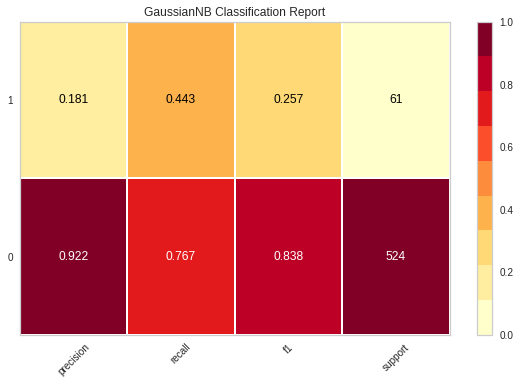

In [29]:
# Plotting the classification report
plot_model(estimator = nb, plot = 'class_report')

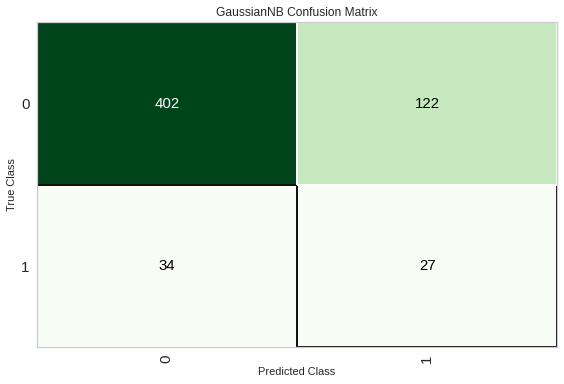

In [30]:
# Plotting the confusion matrix
plot_model(estimator = nb, plot = 'confusion_matrix')

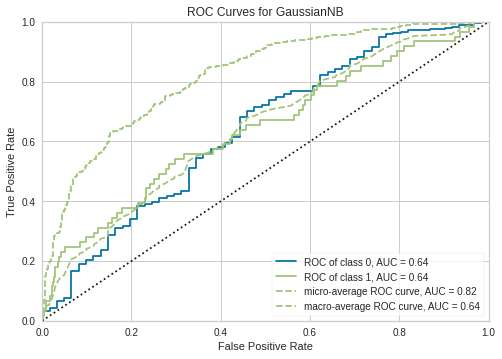

In [31]:
# Plotting the AUC
plot_model(estimator = nb, plot = 'auc')

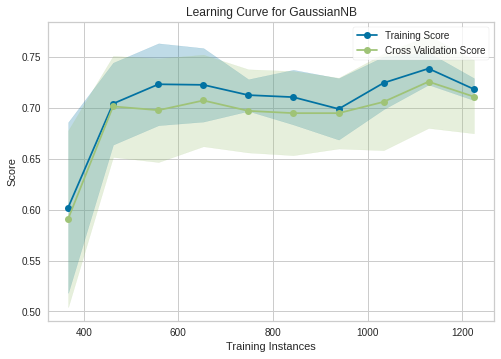

In [32]:
# Plotting the learning curve
plot_model(estimator = nb, plot = 'learning' )

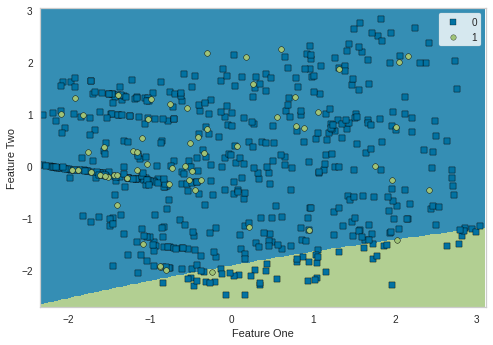

In [33]:
plot_model(estimator = nb, plot='boundary')

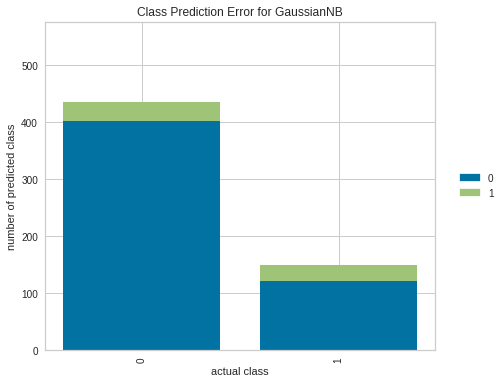

In [34]:
plot_model(estimator = nb, plot = 'error')

In [48]:
evaluate_model(estimator = nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: nb

In [39]:
# tune hyperparameters to optimize AUC
tuned_nb = tune_model(nb, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7007,0.5401,0.2857,0.1143,0.1633,0.0202,0.0234
1,0.6058,0.5372,0.2667,0.0851,0.1290,-0.0443,-0.0564
2,0.7059,0.6165,0.5714,0.1905,0.2857,0.1553,0.1925
3,0.7500,0.6358,0.3571,0.1667,0.2273,0.1011,0.1116
4,0.8162,0.6915,0.4286,0.2609,0.3243,0.2252,0.2345
5,0.7426,0.6194,0.3571,0.1613,0.2222,0.0937,0.1043
6,0.7353,0.5790,0.2857,0.1333,0.1818,0.0482,0.0532
7,0.6985,0.5509,0.3571,0.1351,0.1961,0.0549,0.0648
8,0.6838,0.5907,0.3571,0.1282,0.1887,0.0438,0.0527
9,0.6618,0.5059,0.2857,0.1000,0.1481,-0.0051,-0.0062


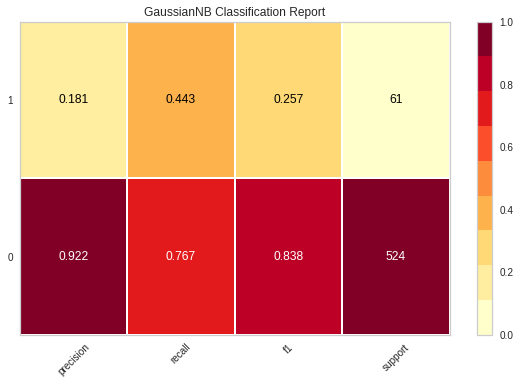

In [40]:
# Plotting the classification report
plot_model(estimator = tuned_nb, plot = 'class_report')

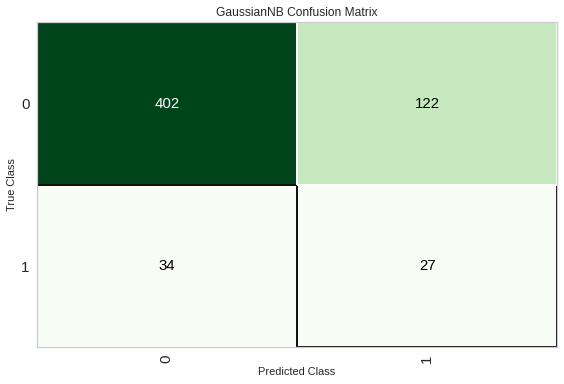

In [41]:
# Plotting the confusion matrix
plot_model(estimator = tuned_nb, plot = 'confusion_matrix')

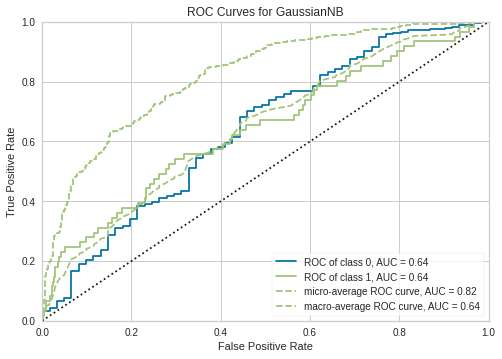

In [43]:
# Plotting the AUC
plot_model(estimator = tuned_nb, plot = 'auc')

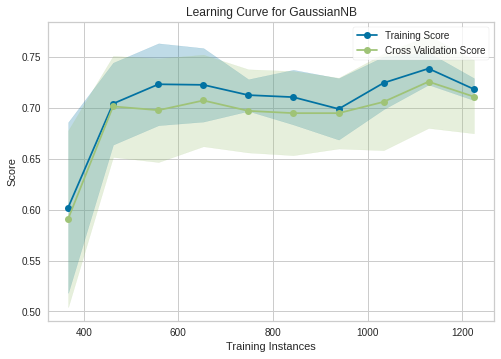

In [44]:
# Plotting the learning curve
plot_model(estimator = tuned_nb, plot = 'learning' )

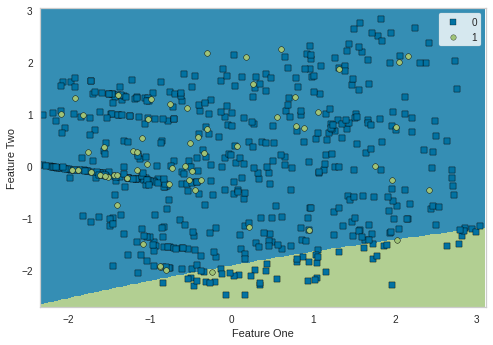

In [45]:
plot_model(estimator = tuned_nb, plot='boundary')

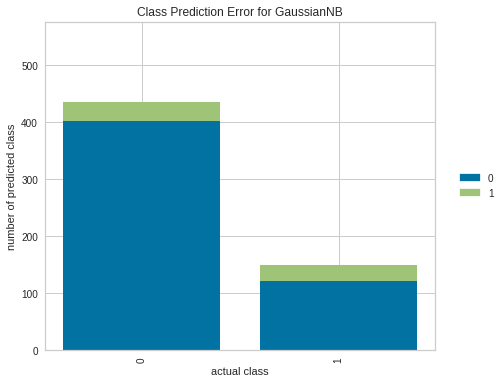

In [46]:
plot_model(estimator = tuned_nb, plot = 'error')

In [47]:
evaluate_model(estimator = tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
calibrate_model(estimator = lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6277,0.4437,0.2857,0.0889,0.1356,-0.0240,-0.0307
1,0.6204,0.5546,0.4000,0.1224,0.1875,0.0238,0.0310
2,0.6838,0.6792,0.6429,0.1915,0.2951,0.1622,0.2118
3,0.6544,0.7547,0.7143,0.1887,0.2985,0.1620,0.2255
4,0.6985,0.6060,0.5000,0.1707,0.2545,0.1194,0.1466
5,0.6397,0.6528,0.5714,0.1569,0.2462,0.1009,0.1374
6,0.6838,0.6628,0.5714,0.1778,0.2712,0.1354,0.1732
7,0.6618,0.6247,0.5714,0.1667,0.2581,0.1174,0.1549
8,0.6471,0.6616,0.5714,0.1600,0.2500,0.1062,0.1432
9,0.5735,0.4245,0.2857,0.0769,0.1212,-0.0489,-0.0674


CalibratedClassifierCV(base_estimator=LinearDiscriminantAnalysis(n_components=None,
                                                                 priors=None,
                                                                 shrinkage=None,
                                                                 solver='svd',
                                                                 store_covariance=False,
                                                                 tol=0.0001),
                       cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                       method='sigmoid')

In [49]:
# finalize a model
final_tuned_nb = finalize_model(tuned_nb)

In [50]:
# save a model
save_model(final_tuned_nb, base_dir + 'model/tuned_nb')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['Title_title',
                                                        'Review_content',
                                                        'Title_Dominant_Topic',
                                                        'Title_Perc_Dominant_Topic',
                                                        'Review_Dominant_Topic',
                                                        'Review_Perc_Dominant_Topic'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='sentiment_rating',
                                       time...
                 ('binn', 'passthrough'), ('rem_ou

## Loading model

In [51]:
# Loading the saved model
tuned_nb_model = load_model(base_dir + 'model/tuned_nb')
tuned_nb_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['Title_title',
                                                       'Review_content',
                                                       'Title_Dominant_Topic',
                                                       'Title_Perc_Dominant_Topic',
                                                       'Review_Dominant_Topic',
                                                       'Review_Perc_Dominant_Topic'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='sentiment_rating',
                                      time...
                ('binn', 'passthrough'), ('rem_outliers', 'passth